# Homework 12

- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
- compare to sklearn implementation

In [1]:
import numpy as np
import pandas as pd
import random
#import os
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(21)
%matplotlib inline

In [2]:
# Simple accuracy function

def accuracy( predicted, original):
    counter = 0   
    for i in range(len (predicted)):
        if predicted[i] == original[i]:
            counter = counter + 1
    return  (counter / len(predicted))

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 2)

## Implementation based on class Percepton from sklearn library

In [4]:
per_clf = Perceptron(tol=0.00001, random_state = 3 )
per_clf.fit(X_train, y_train, coef_init = [0,0], intercept_init = 2)

predicted = per_clf.predict(X_test)
print('Accyracy - train data: ', per_clf.score(X_train, y_train))
print('Accyracy - test data: ', accuracy(predicted, y_test) )
print('Number of iterations: ', per_clf.n_iter_)

print('Weights assigned to the features: ', per_clf.coef_)
print('Constants in decision function: ', per_clf.intercept_ ) 

Accyracy - train data:  1.0
Accyracy - test data:  1.0
Number of iterations:  7
Weights assigned to the features:  [[-1.2 -0.4]]
Constants in decision function:  [3.]


## The Perceptron Algorithm From Scratch
based on https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3

In [5]:
class Perceptron(object):
    
    def __init__(self, number_of_weights, epochs=100, learning_rate=0.01):
        self.weights = np.zeros(number_of_weights + 1)
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    def predict(self, inputs):
        sumation = np.dot(inputs, self.weights[1:]) + self.weights[0]  #f(x) = 1 if w · x + b > 0 else 0
        if sumation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for i in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs  # w<-w + α(y—f(x))x
                self.weights[0] += self.learning_rate * (label - prediction)
                
    def predictFull(self, inputs):
        labels = []
        for flower in inputs:
            labels.append(self.predict(flower))
        return labels


In [6]:
per = Perceptron(2)
per.train(X_train, y_train)
outcomes = per.predictFull(X_test) 

print('Accyracy - test data: ', accuracy(outcomes, y_test) )
print('Weights assigned to the features: ', per.weights[1:])
print('Constants in decision function: ', per.weights[0] ) 

Accyracy - test data:  1.0
Weights assigned to the features:  [-0.007 -0.009]
Constants in decision function:  0.02


## Visualisation and results

In [7]:
w1 = per.weights[1]
w2 = per.weights[2]
w0 = per.weights[0]

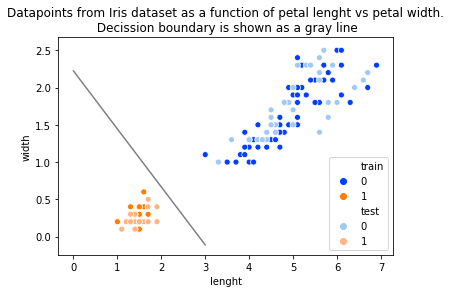

In [8]:
df_train = pd.DataFrame(X_train, columns = ['lenght', 'width'])
df_train['train'] = y_train
df_test = pd.DataFrame(X_test, columns = ['lenght', 'width'])
df_test['test'] = y_test

x = np.linspace(0, 3, num= 3)

ax = sns.lineplot(x, -(x*w1+w0)/w2, color = 'gray' )
ax = sns.scatterplot(x="lenght", y="width", hue="train", palette = 'bright', data=df_train)
ax = sns.scatterplot(x="lenght", y="width", hue="test", palette = 'pastel', data=df_test)
ax.set_title('Datapoints from Iris dataset as a function of petal lenght vs petal width.\n Decission boundary is shown as a gray line') ;